We will use the Sheffield Weather Station data , considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])


In [19]:
def permutation_sample(data1, data2):
    '''Generate permutation sample from two data set'''
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    return perm_sample1, perm_sample2

def draw_perm_replicates(data1, data2, func, size = 1):
    '''generate permutation replicates of data'''
    perm_replicates = np.empty(size)
    for i in range(size):
        perm1, perm2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm1, perm2)
    return perm_replicates

def diff_of_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

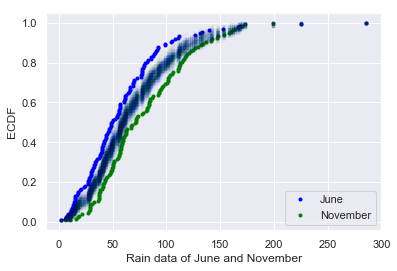

In [15]:
#plotting original data
x1, y1 = ecdf(rain_june)
x2, y2 = ecdf(rain_november)
_ = plt.plot(x1, y1, marker = '.', linestyle = 'none', color = 'blue')
_ = plt.plot(x2, y2, marker = '.', linestyle = 'none', color = 'green')
_ = plt.xlabel('Rain data of June and November')
_ = plt.ylabel('ECDF')
#generating samples for permutation
for _ in range(50):
    perm_sample1, perm_sample2 = permutation_sample(rain_june, rain_november)
    x_1, y_1 = ecdf(perm_sample1)
    x_2, y_2 = ecdf(perm_sample2)
    _ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.02)
    _ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', color = 'green', alpha = 0.02)
    
plt.legend(('June', 'November'), loc = 'lower right')
plt.show()

From the above plot we can see that original data of the month of june and november do not collide with permuation data which proves that they are not identically distributed

Testing the hypothesis of whether they are indentically distributed or not using test statistic of 'difference of mean' and finding the P-value

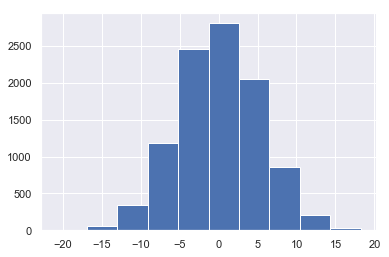

In [20]:
np.random.seed(42)
observed_diff = diff_of_means(rain_june, rain_november)
# drawing difference of mean replicates of permutation sample
perm_reps_diff = draw_perm_replicates(rain_june, rain_november, diff_of_means, size = 10000)
_ = plt.hist(perm_reps_diff)

In [23]:
#finding the p-value
p = np.sum(perm_reps_diff<=observed_diff)/len(perm_reps_diff)
p

0.0

Since our p-value is less than the significance level , so it further proves that the month of june and november are not identically distributed.